# 6. 텍스트와 시퀀스를 위한 딥러닝

### 시퀀스 데이터를 처리하는 기본적인 딥러닝 모델
- 순환 신경망
- 1D 컨브넷

## 6.1 텍스트 데이터 다루기

In [45]:
# code 6-1 단어 수준의 원핫 인코딩
import numpy as np

# 초기 데이터: 각 원소가 샘플입니다
# (이 예에서 하나의 샘플이 하나의 문장입니다. 하지만 문서 전체가 될 수도 있습니다)
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# 데이터에 있는 모든 토큰의 인덱스를 구축합니다
token_index = {}
for sample in samples:
    # split() 메서드를 사용해 샘플을 토큰으로 나눕니다.
    # 실전에서는 구둣점과 특수 문자도 사용합니다.
    for word in sample.split():
        if word not in token_index:
            # 단어마다 고유한 인덱스를 할당합니다.
            token_index[word] = len(token_index) + 1
            # 인덱스 0은 사용하지 않습니다.

# 샘플을 벡터로 변환합니다.
# 각 샘플에서 max_length 까지 단어만 사용합니다.
max_length = 10

# 결과를 저장할 배열입니다
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.

In [46]:
results.shape

(2, 10, 11)

In [47]:
# code 6-2 문자 수준의 원핫 인코딩
import string

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable  # 출력 가능한 모든 아스키(ASCII) 문자
token_index = dict(zip(characters, range(1, len(characters) + 1)))

max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample[:max_length]):
        index = token_index.get(character)
        results[i, j, index] = 1.

In [48]:
results.shape

(2, 50, 101)

In [49]:
# code 6-3 keras를 사용한 단어 수준의 원핫 인코딩
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# 가장 빈도가 높은 1,000개의 단어만 선택하도록 Tokenizer 객체를 만듭니다.
tokenizer = Tokenizer(num_words=1000)
# 단어 인덱스를 구축합니다.
tokenizer.fit_on_texts(samples)

# 문자열을 정수 인덱스의 리스트로 변환합니다.
sequences = tokenizer.texts_to_sequences(samples)

# 직접 원-핫 이진 벡터 표현을 얻을 수 있습니다.
# 원-핫 인코딩 외에 다른 벡터화 방법들도 제공합니다!
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

# 계산된 단어 인덱스를 구합니다.
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


In [50]:
one_hot_results.shape

(2, 1000)

In [51]:
word_index

{'the': 1,
 'cat': 2,
 'sat': 3,
 'on': 4,
 'mat': 5,
 'dog': 6,
 'ate': 7,
 'my': 8,
 'homework': 9}

In [52]:
# code 6-4 해싱 기법을 사용한 단어 수준의 원핫 인코딩
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# 단어를 크기가 1,000인 벡터로 저장합니다.
# 1,000개(또는 그이상)의 단어가 있다면 해싱 충돌이 늘어나고 인코딩의 정확도가 감소될 것입니다
dimensionality = 1000
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        # 단어를 해싱하여 0과 1,000 사이의 랜덤한 정수 인덱스로 변환합니다.
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1.

In [53]:
results.shape

(2, 10, 1000)

## 단어 임베딩 사용하기

In [54]:
#code 6-5 Embedding 층의 객체 생성하기
from keras.layers import Embedding
# Embedding(단어 인덱스 최대값 + 1, 엠베딩 차원)
embedding_layer=Embedding(1000, 64)

In [55]:
#code 6-6 Embedding 층에 사용할 IMDB 데이터 로드하기
from keras.datasets import imdb
# from keras import preprocessing

# change to
from keras.utils.data_utils import pad_sequences

max_features = 10000
maxlen = 20

(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=max_features)

# x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
# x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

#change to
x_train = pad_sequences(x_train,maxlen=maxlen)
x_test = pad_sequences(x_test,maxlen=maxlen)

In [56]:
#code 6-7 IMDB 데이터에 Embedding 층과 분류기 사용하기
from keras.models import Sequential
from keras.layers import Flatten,Dense,Embedding

model = Sequential()
model.add(Embedding(10000,8,input_length=maxlen))

model.add(Flatten())

model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
model.summary()

history = model.fit(x_train,y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 20, 8)             80000     
                                                                 
 flatten_6 (Flatten)         (None, 160)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 161       
                                                                 
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
  1/625 [..............................] - ETA: 4:23 - loss: 0.6959 - acc: 0.4375

2022-07-19 10:00:01.027764: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


618/625 [============================>.] - ETA: 0s - loss: 0.6778 - acc: 0.5919

2022-07-19 10:00:06.450197: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 6s 9ms/step - loss: 0.6775 - acc: 0.5920 - val_loss: 0.6405 - val_acc: 0.6816
Epoch 2/10
625/625 [==============================] - 5s 7ms/step - loss: 0.5615 - acc: 0.7447 - val_loss: 0.5384 - val_acc: 0.7220
Epoch 3/10
625/625 [==============================] - 4s 7ms/step - loss: 0.4689 - acc: 0.7869 - val_loss: 0.5057 - val_acc: 0.7440
Epoch 4/10
625/625 [==============================] - 4s 7ms/step - loss: 0.4233 - acc: 0.8102 - val_loss: 0.4971 - val_acc: 0.7496
Epoch 5/10
625/625 [==============================] - 4s 7ms/step - loss: 0.3933 - acc: 0.8265 - val_loss: 0.4965 - val_acc: 0.7554
Epoch 6/10
625/625 [==============================] - 4s 7ms/step - loss: 0.3682 - acc: 0.8396 - val_loss: 0.5007 - val_acc: 0.7516
Epoch 7/10
625/625 [==============================] - 5s 7ms/step - loss: 0.3468 - acc: 0.8523 - val_loss: 0.5064 - val_acc: 0.7528
Epoch 8/10
625/625 [==============================] - 5s 8ms/step - loss: 0.3269 - acc:

In [57]:
#code 6-8 IMDB 원본 데이터 전처리하기
import os

imdb_dir = 'dataset/aclImdb'
train_dir = os.path.join(imdb_dir,'train')

labels=[]
texts=[]

for label_type in ['neg','pos']:
    dir_name = os.path.join(train_dir,label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name,fname),encoding='utf8')
            texts.append(f.read())
            f.close()
            if label_type =='neg':
                labels.append(0)
            else: 
                labels.append(1)


In [58]:
#code 6-9 IMDB 원본 데이터의 텍스트를 토큰화하기
from keras.preprocessing.text import Tokenizer

# from keras.preprocessing.sequence import pad_sequences
# change to
from keras.utils.data_utils import pad_sequences

import numpy as np

maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('%s개의 고유한 토큰을 찾았습니다.' % len(word_index))

data = pad_sequences(sequences,maxlen=maxlen)
labels = np.asarray(labels)
print('데이터 텐서의 크기:{}'.format(data.shape))
print('레이블 텐서의 크기:{}'.format(labels.shape))

indices = np.asarray(labels)
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples:training_samples+validation_samples]
y_val = labels[training_samples:training_samples+validation_samples]

88582개의 고유한 토큰을 찾았습니다.
데이터 텐서의 크기:(25000, 100)
레이블 텐서의 크기:(25000,)


In [59]:
#code 6-10 GloVe 단어 임베딩 파일 파싱하기
glove_dir = 'dataset'

embeddings_index={}
f = open(os.path.join(glove_dir,'glove.6B.100d.txt'),encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:],dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('%s개의 단어 벡터를 찾았습니다.' %len(embeddings_index))

400000개의 단어 벡터를 찾았습니다.


In [60]:
#code 6-11 GloVe 단어 임베딩 행렬 준비하기
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # 임베딩 인덱스에 없는 단어는 모두 0이 됩니다.
            embedding_matrix[i] = embedding_vector
            

In [61]:
#code 6-12 모델 정의하기
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_7 (Flatten)         (None, 10000)             0         
                                                                 
 dense_9 (Dense)             (None, 32)                320032    
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [62]:
#code 6-13 사전 훈련된 단어 임베딩을 Embedding층에 로드하기

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [63]:
#code 6-14 훈련과 평가하기
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
1/7 [===>..........................] - ETA: 2s - loss: 0.6343 - acc: 0.5000

2022-07-19 10:00:58.448989: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - ETA: 0s - loss: 0.1021 - acc: 0.9200

2022-07-19 10:00:58.848060: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 2s 210ms/step - loss: 0.1021 - acc: 0.9200 - val_loss: 3.3810e-04 - val_acc: 1.0000
Epoch 2/10
7/7 [==============================] - 1s 185ms/step - loss: 2.5725e-04 - acc: 1.0000 - val_loss: 1.6199e-04 - val_acc: 1.0000
Epoch 3/10
7/7 [==============================] - 1s 166ms/step - loss: 1.3371e-04 - acc: 1.0000 - val_loss: 9.7883e-05 - val_acc: 1.0000
Epoch 4/10
7/7 [==============================] - 1s 170ms/step - loss: 8.4583e-05 - acc: 1.0000 - val_loss: 6.7388e-05 - val_acc: 1.0000
Epoch 5/10
7/7 [==============================] - 1s 156ms/step - loss: 6.0084e-05 - acc: 1.0000 - val_loss: 4.9689e-05 - val_acc: 1.0000
Epoch 6/10
7/7 [==============================] - 1s 153ms/step - loss: 4.3800e-05 - acc: 1.0000 - val_loss: 3.4691e-05 - val_acc: 1.0000
Epoch 7/10
7/7 [==============================] - 1s 166ms/step - loss: 3.0543e-05 - acc: 1.0000 - val_loss: 2.4138e-05 - val_acc: 1.0000
Epoch 8/10
7/7 [==============================] -

In [64]:
import matplotlib.pyplot as plt

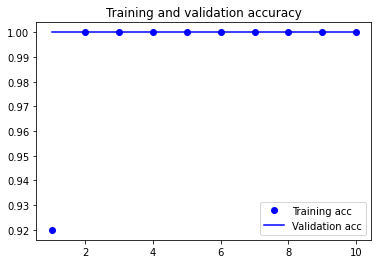

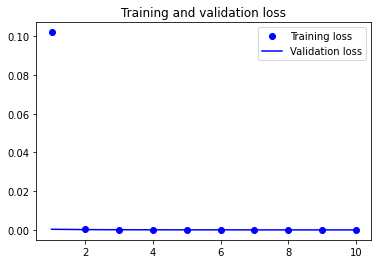

In [65]:
#code 6-15 결과 그래프 그리기
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [66]:
#code 6-16 사전 훈련된 단어 임베딩을 사용하지 않고 같은 모델 훈련하기
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 100, 100)          1000000   
                                                                 
 flatten_8 (Flatten)         (None, 10000)             0         
                                                                 
 dense_11 (Dense)            (None, 32)                320032    
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10


2022-07-19 10:01:09.175984: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - ETA: 0s - loss: 0.1905 - acc: 1.0000

2022-07-19 10:01:09.602971: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 2s 198ms/step - loss: 0.1905 - acc: 1.0000 - val_loss: 0.0215 - val_acc: 1.0000
Epoch 2/10
7/7 [==============================] - 1s 170ms/step - loss: 0.0146 - acc: 1.0000 - val_loss: 0.0076 - val_acc: 1.0000
Epoch 3/10
7/7 [==============================] - 1s 166ms/step - loss: 0.0058 - acc: 1.0000 - val_loss: 0.0036 - val_acc: 1.0000
Epoch 4/10
7/7 [==============================] - 1s 154ms/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 5/10
7/7 [==============================] - 1s 154ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 6/10
7/7 [==============================] - 1s 165ms/step - loss: 9.4142e-04 - acc: 1.0000 - val_loss: 6.8163e-04 - val_acc: 1.0000
Epoch 7/10
7/7 [==============================] - 1s 162ms/step - loss: 5.7162e-04 - acc: 1.0000 - val_loss: 4.1985e-04 - val_acc: 1.0000
Epoch 8/10
7/7 [==============================] - 1s 172ms/step - loss: 3.5500e-04 - 

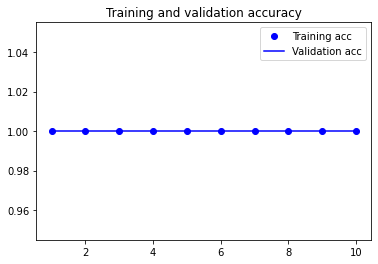

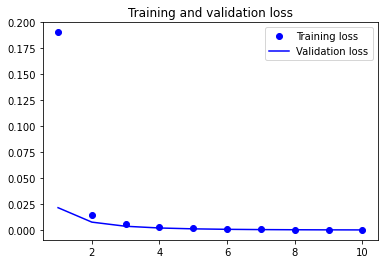

In [67]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [68]:
#code 6-16 with more samples
training_samples = 2000
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [69]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/10
63/63 [==============================] - 2s 25ms/step - loss: 2.8477e-05 - acc: 1.0000 - val_loss: 2.6025e-06 - val_acc: 1.0000
Epoch 2/10
63/63 [==============================] - 2s 25ms/step - loss: 8.0886e-07 - acc: 1.0000 - val_loss: 1.6526e-07 - val_acc: 1.0000
Epoch 3/10
63/63 [==============================] - 1s 24ms/step - loss: 5.3627e-08 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 4/10
63/63 [==============================] - 2s 25ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 5/10
63/63 [==============================] - 1s 23ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 6/10
63/63 [==============================] - 1s 23ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 7/10
63/63 [==============================] - 1s 23ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 8/10
63/63 [=========

In [70]:
#code 6-17 테스트 데이터 토큰화 하기
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [71]:
# code 6-18 테스트 세트에서 모델 평가하기
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 3s 4ms/step - loss: 2.5513 - acc: 0.4984


[2.551332950592041, 0.4984000325202942]